In [1]:
import graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
from IPython.core.pylabtools import figsize
import pickle
import pandas as pd
# import numpy as np
from sklearn.tree import DecisionTreeRegressor  # the dt regressor
# split the data into training data and testing data
from sklearn.model_selection import train_test_split
# from sklearn import metrics  # measure prediction performance
import matplotlib.pyplot as plt
from sklearn import tree


In [2]:
with open("rules_strategy.pickle", "rb") as p:
    data_rules = pickle.load(p)

In [3]:
data_rules = pd.DataFrame(data_rules)

In [4]:
data_rules['lag'] = data_rules['rules'].apply(lambda x: x.get('lag'))
data_rules['sigma'] = data_rules['rules'].apply(lambda x: x.get('sigma'))
data_rules['window_ma'] = data_rules['rules'].apply(lambda x: x.get('window_ma'))
data_rules['window_std'] = data_rules['rules'].apply(lambda x: x.get('window_std'))

In [5]:
X = data_rules[['lag', 'sigma', 'window_ma', 'window_std']]
y = data_rules['cumsum']

In [6]:
dregressor = DecisionTreeRegressor()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [8]:
dregressor = dregressor.fit(X_train, y_train)

In [9]:
y_pred = dregressor.predict(X_test)

In [10]:
print(y_pred)

[0.18557404 0.30967262 0.31249218 0.41534856 0.1988726  0.21772016
 0.31798304 0.23800086 0.27688413 0.35565433 0.29172214 0.34724831
 0.1988726  0.42608225 0.80839073 0.40029582 0.2367753  0.35386688
 0.2299342  0.16053894 0.25363988 0.21772016 0.24468541 0.32513896
 0.2299342  0.30072148 0.21346864 0.22386162 0.16053894 0.23800086
 0.30072148 0.29172214 0.23608758 0.34724831 0.2299342  0.40600655
 0.30820411 0.1988726  0.42608225 0.31798304 0.31287349 0.22386162
 0.22804696 0.29172214 0.24468541 0.31287349 0.23608758 0.31798304
 0.20907022 0.21772016 0.1988726  0.40029582 0.35386688 0.32513896]


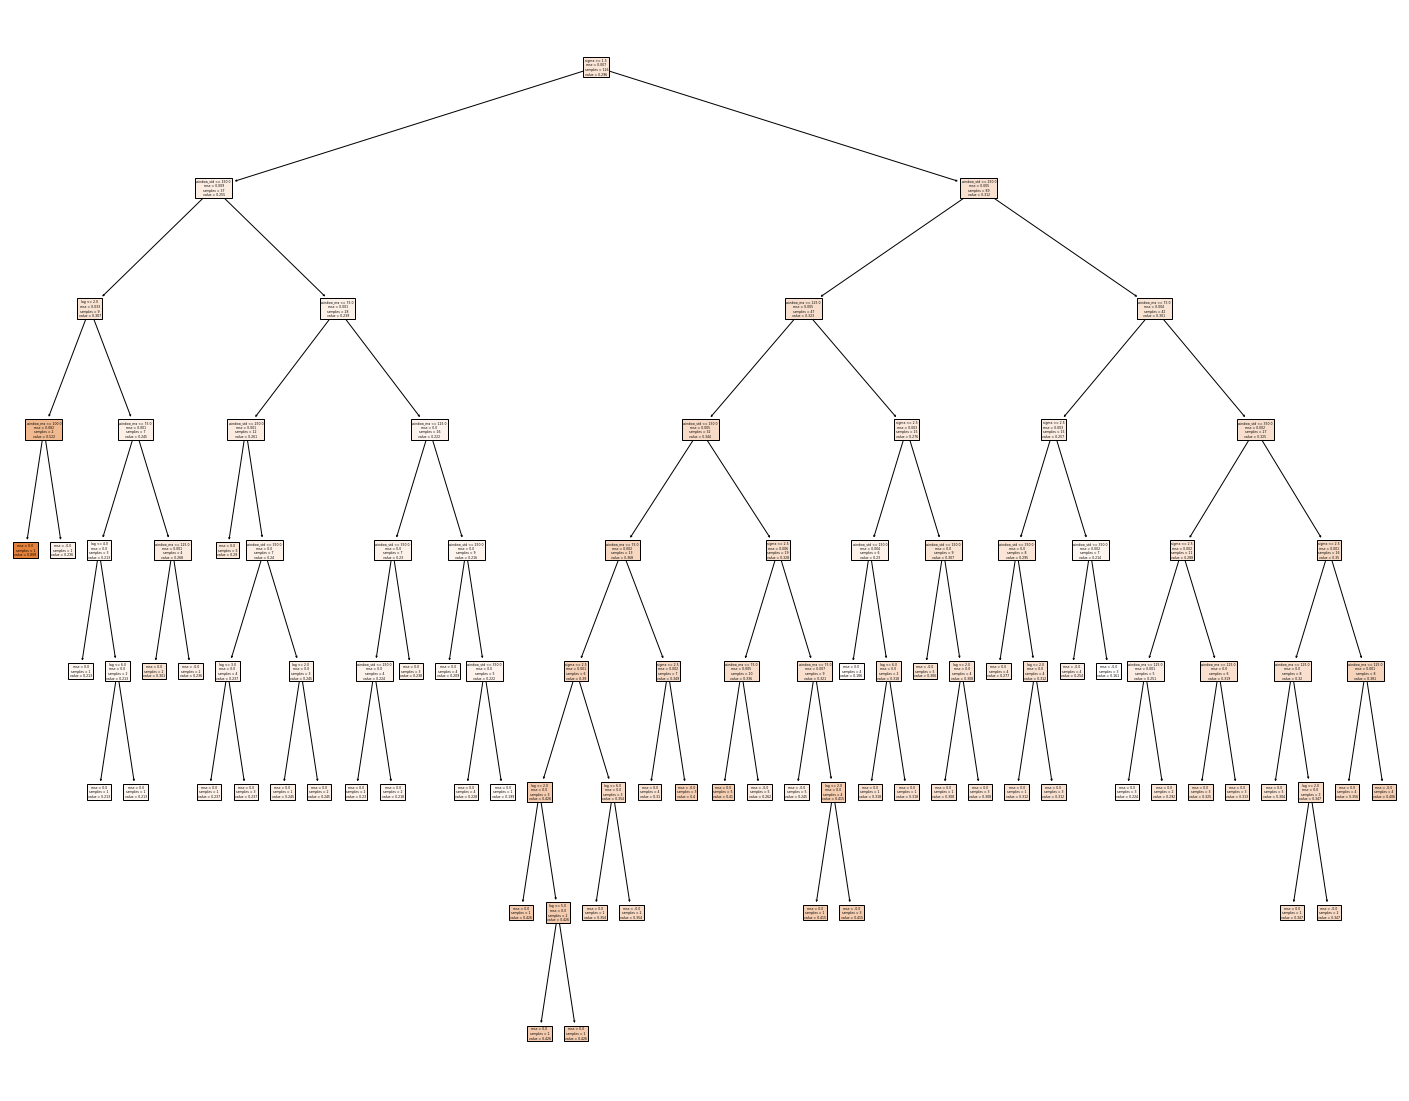

In [11]:
fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(
    dregressor,
    filled=True,
    feature_names=list(X.columns)
)
fig.savefig('tree_plot.png')

In [16]:
list(X.columns)

['lag', 'sigma', 'window_ma', 'window_std']

In [18]:
dot_data = tree.export_graphviz(dregressor, out_file=None, feature_names=list(X.columns), filled=True)

In [20]:
graph = graphviz.Source(dot_data, format='png')

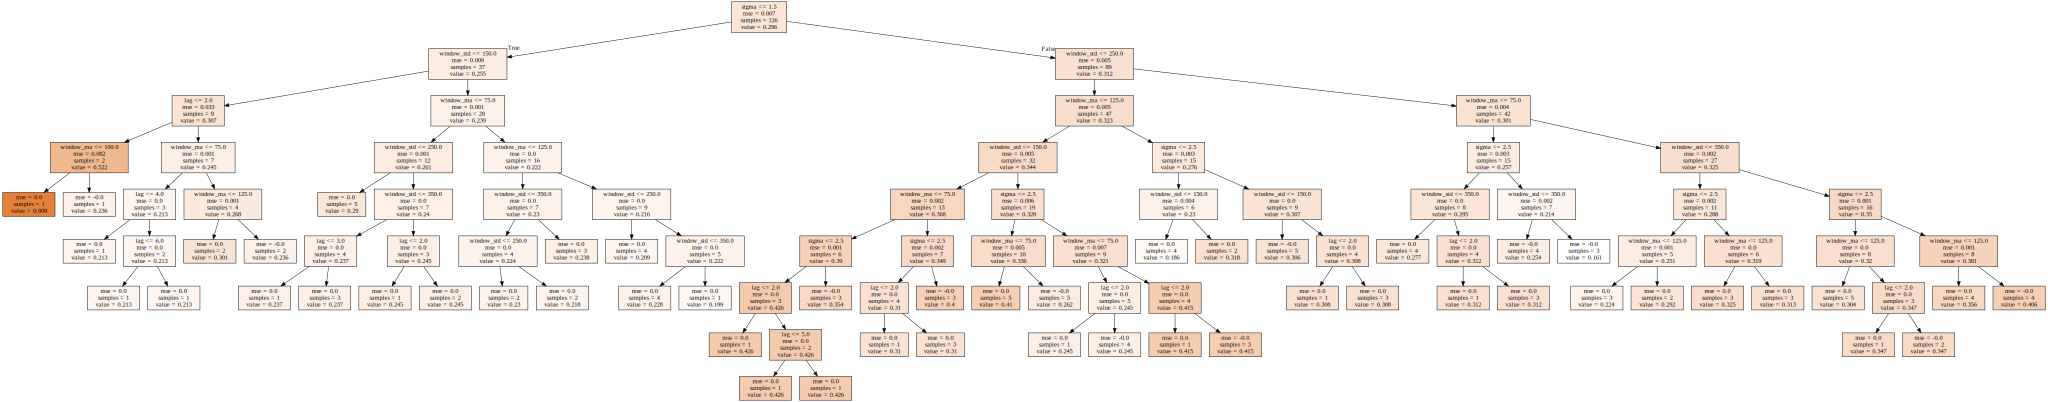

In [21]:
graph